<a href="https://colab.research.google.com/github/bonareri/Machine_Learning_1/blob/main/ML_Data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [14]:
# Load the dataset
chip_data = pd.read_csv("/content/chip_dataset.csv")
chip_data.head()

,Unnamed: 0,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,NaN,NaN,NaN
1,1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD,NaN,NaN,NaN
2,2,Intel Core i5-1145G7,CPU,2020-09-02,10.0,28.0,NaN,NaN,2600.0,Intel,Intel,NaN,NaN,NaN
3,3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel,NaN,NaN,NaN
4,4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD,NaN,NaN,NaN


## Data Cleaning

In [15]:
# Drop the redundant index column
chip_data = chip_data.drop(columns=["Unnamed: 0"])

# Standardize column names for consistency
chip_data.columns = chip_data.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("(", "").str.replace(")", "")

# Display basic information about the dataset, including missing values
chip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product              4854 non-null   object 
 1   type                 4854 non-null   object 
 2   release_date         4854 non-null   object 
 3   process_size_nm      4845 non-null   float64
 4   tdp_w                4228 non-null   float64
 5   die_size_mm^2        4139 non-null   float64
 6   transistors_million  4143 non-null   float64
 7   freq_mhz             4854 non-null   float64
 8   foundry              4854 non-null   object 
 9   vendor               4854 non-null   object 
 10  fp16_gflops          536 non-null    float64
 11  fp32_gflops          1948 non-null   float64
 12  fp64_gflops          1306 non-null   float64
dtypes: float64(8), object(5)
memory usage: 493.1+ KB


In [16]:
# Calculate percentage of missing data for each column
missing_percentage = chip_data.isnull().mean() * 100

# Display columns sorted by percentage of missing data
missing_percentage.sort_values(ascending=False)

,0
fp16_gflops,88.957561
fp64_gflops,73.094355
fp32_gflops,59.868150
die_size_mm^2,14.730119
transistors_million,14.647713
tdp_w,12.896580
process_size_nm,0.185414
product,0.000000
type,0.000000
release_date,0.000000


### Dropping non-consequntial fields

In [17]:
# Drop non-consequential fields with high missing values
chip_data = chip_data.drop(columns=["fp16_gflops", "fp32_gflops", "fp64_gflops"])

# Verify the columns were dropped
print(chip_data.columns)

Index(['product', 'type', 'release_date', 'process_size_nm', 'tdp_w',
       'die_size_mm^2', 'transistors_million', 'freq_mhz', 'foundry',
       'vendor'],
      dtype='object')


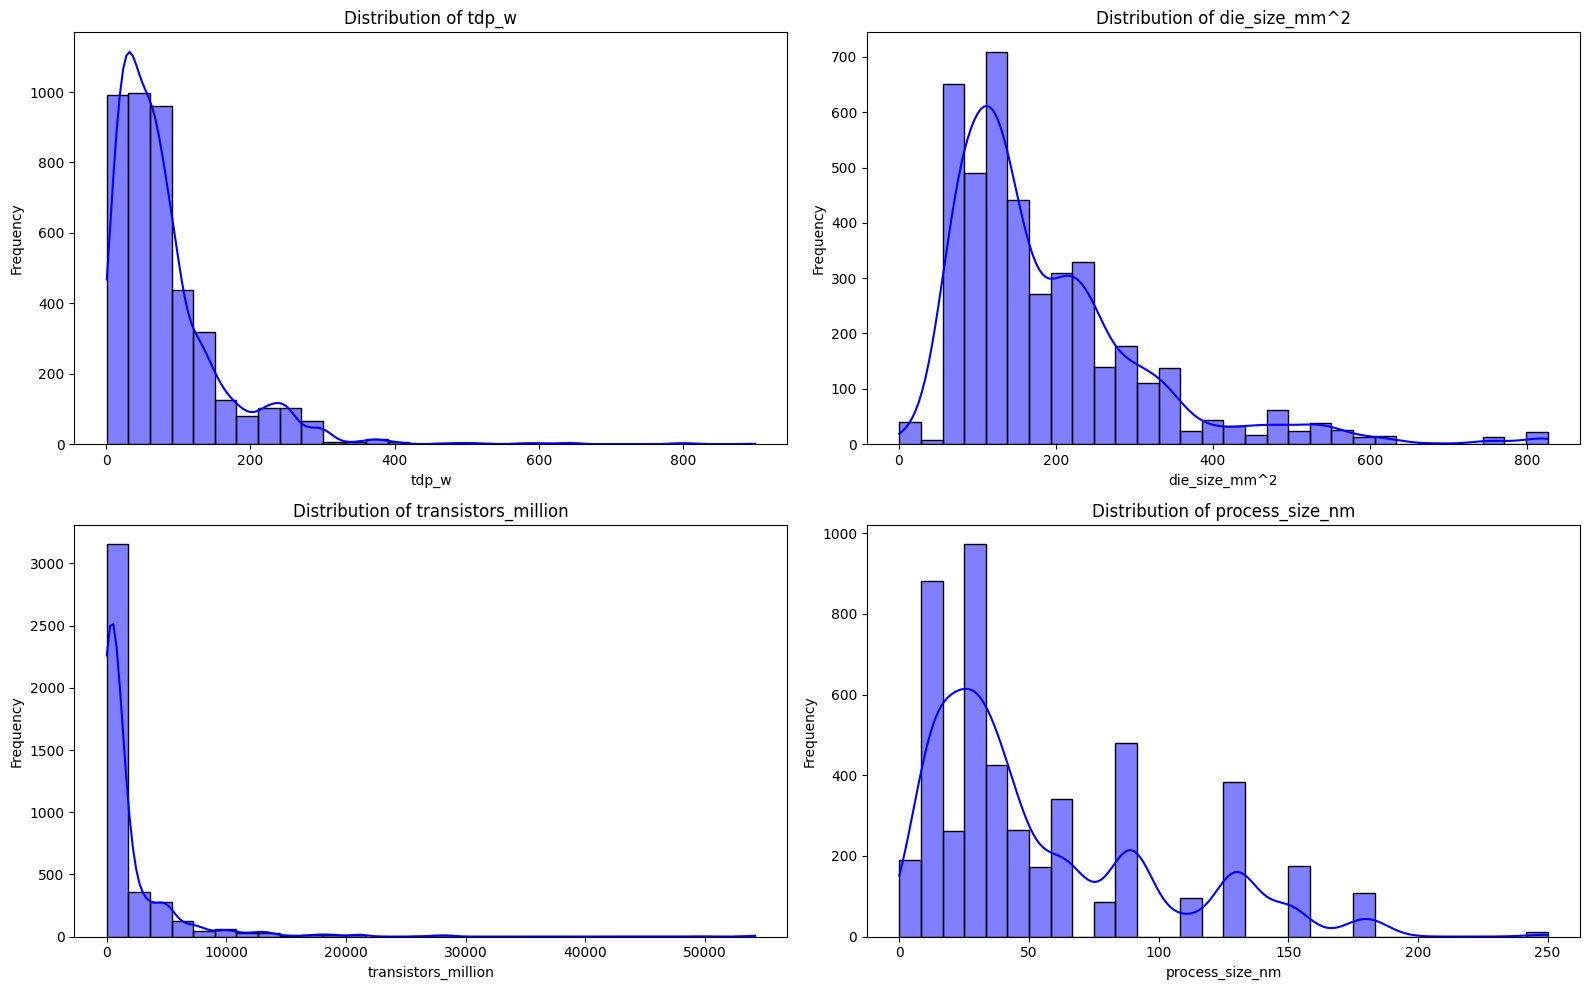

In [18]:
# Visualize the distributions of columns with missing values
columns_to_plot = ['tdp_w', 'die_size_mm^2', 'transistors_million', 'process_size_nm']
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

for col, ax in zip(columns_to_plot, axes.flatten()):
    sns.histplot(chip_data[col], kde=True, ax=ax, color='blue', bins=30)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


### imputation by median

In [19]:
# List of numeric columns for imputation
numeric_columns = ['process_size_nm', 'tdp_w', 'die_size_mm^2', 'transistors_million']

# Perform median imputation
for column in numeric_columns:
    median_value = chip_data[column].median()
    chip_data[column].fillna(median_value, inplace=True)
    # print(f"{column}: Imputed missing values with median = {median_value}")

<ipython-input-19-6fa889412c14>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  chip_data[column].fillna(median_value, inplace=True)


In [20]:
#check missing values
chip_data.isnull().sum()

,0
product,0
type,0
release_date,0
process_size_nm,0
tdp_w,0
die_size_mm^2,0
transistors_million,0
freq_mhz,0
foundry,0
vendor,0


### Transforming release_date to the corrrect format (date time)

In [21]:
# Convert `release_date` to datetime format
chip_data['release_date'] = pd.to_datetime(chip_data['release_date'], errors='coerce')

# Summary of invalid date conversions (if any)
invalid_dates = chip_data['release_date'].isnull().sum()

# Output the number of invalid dates, and display any rows with invalid dates
print(f"Number of invalid release_date values: {invalid_dates}")
print("\nRows with invalid release_date:")
print(chip_data[chip_data['release_date'].isnull()])

# Perform forward fill to fill missing release_date values
chip_data['release_date'].fillna(method='ffill', inplace=True)

# Display the updated data with filled values for release_date
print("\nData after filling missing release_date values with forward fill:")
print(chip_data[['product', 'release_date']].head(10))  # Displaying the first 10 rows as an example


Number of invalid release_date values: 75

Rows with invalid release_date:
                        product type release_date  process_size_nm  tdp_w  \
68         Intel Core i7-9850HE  CPU          NaT             14.0   45.0   
1558       Intel Core i7-9850HL  CPU          NaT             14.0   25.0   
2026      Intel Core i9-10990XE  CPU          NaT             14.0  380.0   
2221     NVIDIA Jetson Nano GPU  GPU          NaT             20.0   10.0   
2237          3dfx Spectre 1000  GPU          NaT            180.0   30.0   
...                         ...  ...          ...              ...    ...   
4737           Intel Xe DG1 OEM  GPU          NaT             10.0   30.0   
4798  NVIDIA Quadro T400 Mobile  GPU          NaT             12.0   18.0   
4810      AMD Radeon Pro V7300X  GPU          NaT             14.0  130.0   
4820         AMD FirePro W4130M  GPU          NaT             28.0   65.0   
4833        AMD Radeon R9 280X2  GPU          NaT             28.0  375.0   



<ipython-input-21-ecf5308f7e67>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  chip_data['release_date'].fillna(method='ffill', inplace=True)
<ipython-input-21-ecf5308f7e67>:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chip_data['release_date'].fillna(method='ffill', inplace=True)


In [ ]:
chip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   product              4854 non-null   object        
 1   type                 4854 non-null   object        
 2   release_date         4854 non-null   datetime64[ns]
 3   process_size_nm      4854 non-null   float64       
 4   tdp_w                4854 non-null   float64       
 5   die_size_mm^2        4854 non-null   float64       
 6   transistors_million  4854 non-null   float64       
 7   freq_mhz             4854 non-null   float64       
 8   foundry              4854 non-null   object        
 9   vendor               4854 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(4)
memory usage: 379.3+ KB


In [ ]:
# Create a new column for the year of release for analysis purposes
chip_data['release_year'] = chip_data['release_date'].dt.year

# Check the data types and ensure necessary columns are correctly formatted
chip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   product              4854 non-null   object        
 1   type                 4854 non-null   object        
 2   release_date         4854 non-null   datetime64[ns]
 3   process_size_nm      4854 non-null   float64       
 4   tdp_w                4854 non-null   float64       
 5   die_size_mm^2        4854 non-null   float64       
 6   transistors_million  4854 non-null   float64       
 7   freq_mhz             4854 non-null   float64       
 8   foundry              4854 non-null   object        
 9   vendor               4854 non-null   object        
 10  release_year         4854 non-null   int32         
dtypes: datetime64[ns](1), float64(5), int32(1), object(4)
memory usage: 398.3+ KB


##  Exploratory Data Analysis (EDA)

### a. Moore's Law (Doubling of Transistor Density)

Moore's Law states that the number of transistors in a microchip doubles approximately every 2 years.

- Hypothesis: Transistor count increases significantly over time (indicating Moore's Law).

- visualize transistors_million against release_date and check for exponential growth in transistor counts over time, especially for GPUs.

In [ ]:
# Prepare data for Moore's Law analysis (transistor count over time)
chip_data_moores = chip_data[['release_date', 'transistors_million', 'type']].copy()
chip_data_moores['year'] = chip_data_moores['release_date'].dt.year

# Group by year and type (CPU/GPU) for median transistor count
moores_trend = chip_data_moores.groupby(['year', 'type']).median().reset_index()

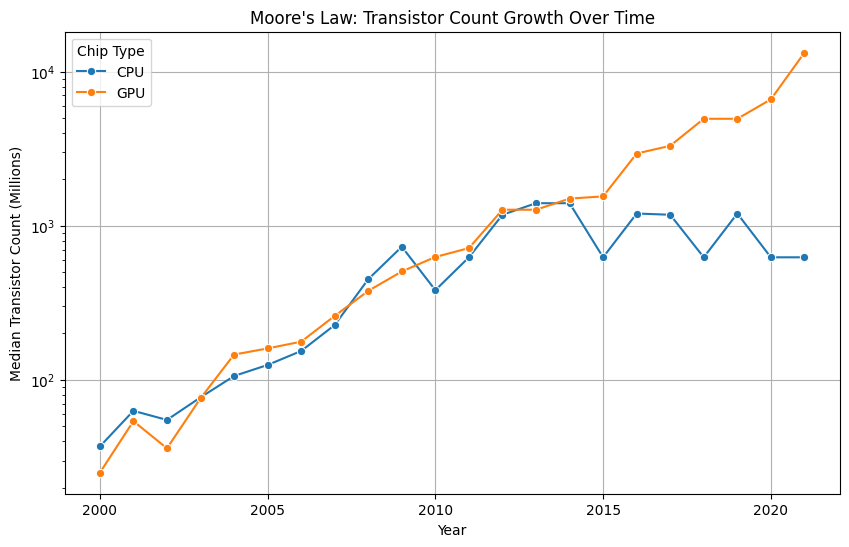

In [ ]:
# Visualize Moore's Law: Transistor count over time for CPUs and GPUs
plt.figure(figsize=(10, 6))
sns.lineplot(data=moores_trend, x='year', y='transistors_million', hue='type', marker='o')
plt.title('Moore\'s Law: Transistor Count Growth Over Time')
plt.xlabel('Year')
plt.ylabel('Median Transistor Count (Millions)')
plt.legend(title='Chip Type')
plt.yscale('log')  # Use a logarithmic scale for better visualization
plt.grid(True)
plt.show()


### b. Dennard Scaling (Power vs. Size)
**Dennard Scaling** states that as transistors get smaller, their power density remains constant, so power consumption per unit area decreases proportionally. This allows clock speeds to increase without additional power consumption, theoretically improving performance without raising power use.

- Hypothesis: As process_size_nm decreases, tdp_w and die_size_mm^2 (power and size) should not increase drastically for similar performance.

- analyze the relationship between:

Process Size (nm) vs. Frequency (MHz): Clock speeds should increase as process size decreases.

Process Size (nm) vs. TDP (W): Power density should remain stable or decrease as transistors shrink.

Die Size trends can also offer insights into performance scaling.

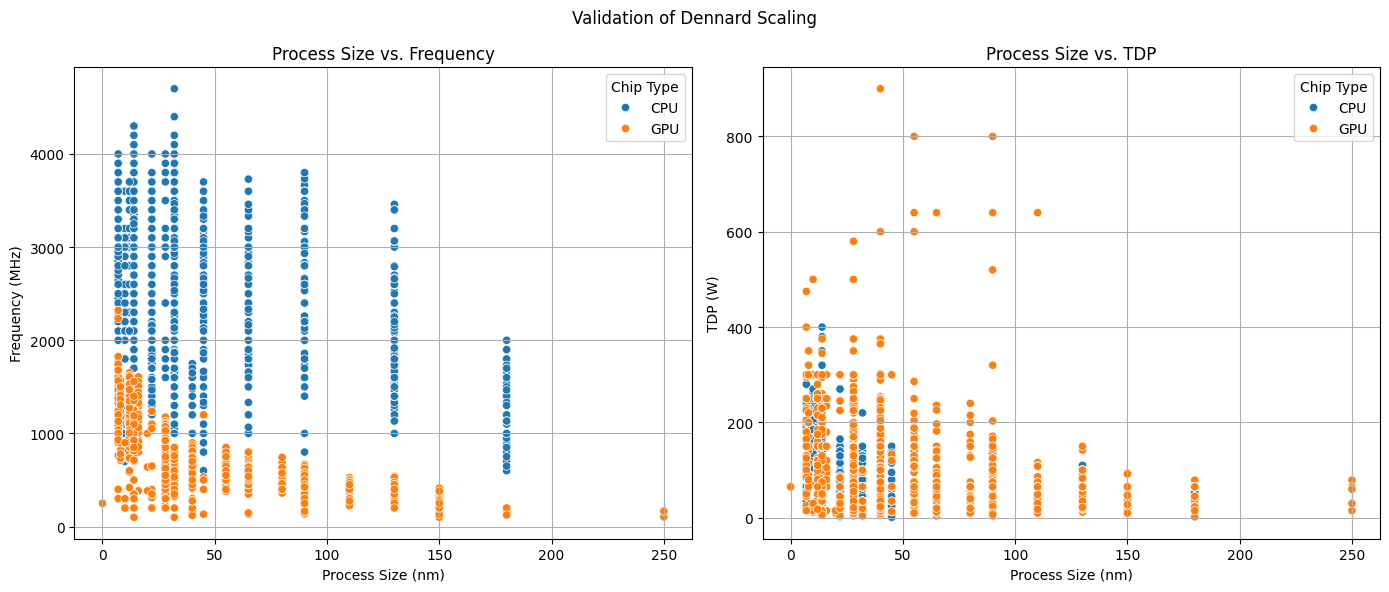

In [ ]:
# Create scatter plots to validate Dennard Scaling
fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

# Process Size vs Frequency
sns.scatterplot(data=chip_data, x='process_size_nm', y='freq_mhz', hue='type', ax=ax[0])
ax[0].set_title('Process Size vs. Frequency')
ax[0].set_xlabel('Process Size (nm)')
ax[0].set_ylabel('Frequency (MHz)')
ax[0].legend(title='Chip Type')
ax[0].grid(True)

# Process Size vs TDP
sns.scatterplot(data=chip_data, x='process_size_nm', y='tdp_w', hue='type', ax=ax[1])
ax[1].set_title('Process Size vs. TDP')
ax[1].set_xlabel('Process Size (nm)')
ax[1].set_ylabel('TDP (W)')
ax[1].legend(title='Chip Type')
ax[1].grid(True)

plt.suptitle('Validation of Dennard Scaling')
plt.tight_layout()
plt.show()

### **Insights from the Plots:**
**1. Process Size vs. Frequency (Left Plot):**

- As the process size decreases, frequency generally increases, supporting Dennard Scaling's premise of performance improvement with transistor shrinkage.
However, the trend shows variability, suggesting that the increase in frequency may be slowing in recent years.

**2. Process Size vs. TDP (Right Plot):**

- While smaller process sizes were expected to reduce power density, TDP (Thermal Design Power) does not decrease proportionally. This indicates that modern chips may consume more power due to increased transistor density and performance demands.
- There's a plateau or slight increase in TDP for newer chips, hinting at the breakdown of Dennard Scaling in modern semiconductor processes.

**Conclusion:**

Dennard Scaling held true in earlier years but appears to be less valid in recent times. While frequencies have increased with smaller transistors, power density has not decreased as expected, possibly due to higher transistor counts and performance requirements.

### c. CPUs Have Higher Frequencies, but GPUs are Catching Up
- Hypothesis: CPUs generally have higher clock speeds (frequency in MHz) than GPUs, but over time, GPU frequencies are increasing and approaching CPU frequencies.

- Compare the frequency trends for CPUs and GPUs over time.
- Visualize how the frequencies of both types of chips have evolved, focusing on whether GPUs are closing the frequency gap with CPUs.

In [ ]:
# Extract year from release date
chip_data['year'] = chip_data['release_date'].dt.year

# Group by year and type, calculate median frequency
freq_trend = chip_data.groupby(['year', 'type'])['freq_mhz'].median().reset_index()

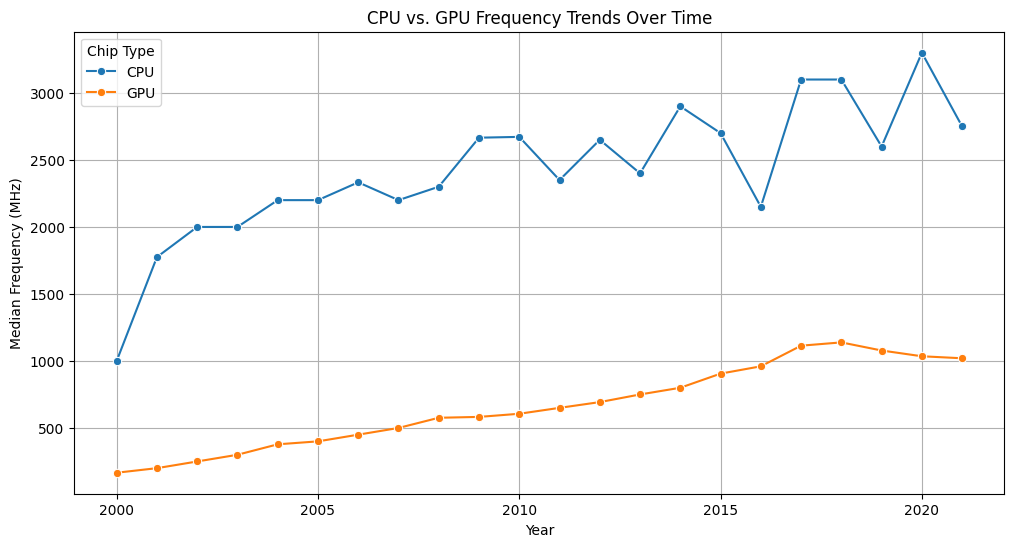

In [ ]:
# Create a line plot to compare CPU and GPU frequency trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=freq_trend, x='year', y='freq_mhz', hue='type', marker='o')
plt.title('CPU vs. GPU Frequency Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Median Frequency (MHz)')
plt.legend(title='Chip Type')
plt.grid(True)
plt.show()


###**Insights from the Plot:**
- **CPUs have consistently higher frequencies** compared to GPUs.
- However, **GPU frequencies are gradually increasing**, especially in recent years.
- The gap between CPU and GPU frequencies has **narrowed**, indicating that GPUs are indeed catching up, although they still generally operate at lower clock speeds than CPUs.
This trend aligns with the need for higher GPU performance in applications like gaming, AI, and parallel processing.

### d. GPU Performance Doubles Every 1.5 Years
To validate the claim that GPU performance doubles every 1.5 years, we need to examine:

1. Performance Metrics: Since "performance" isn't directly given, we'll use transistor count as a proxy. Transistor count correlates strongly with GPU computational power.
2. Trend Analysis: Check if transistor counts follow an exponential growth pattern, doubling approximately every 1.5 years.

In [ ]:
from sklearn.linear_model import LinearRegression

# Filter only GPU data
gpu_data = chip_data[chip_data['type'].str.lower() == 'gpu'].copy()

# Extract year and log-transform transistor count
gpu_data['year'] = gpu_data['release_date'].dt.year
gpu_data['log_transistors'] = np.log2(gpu_data['transistors_million'])

# Drop rows with missing values in 'year' or 'log_transistors'
gpu_data_clean = gpu_data.dropna(subset=['year', 'log_transistors'])


In [ ]:
# Prepare data for modeling
X = gpu_data_clean[['year']]
y = gpu_data_clean['log_transistors']

# Fit the model
model = LinearRegression().fit(X, y)

# Predict and add predictions to the DataFrame
gpu_data_clean['log_pred'] = model.predict(X)

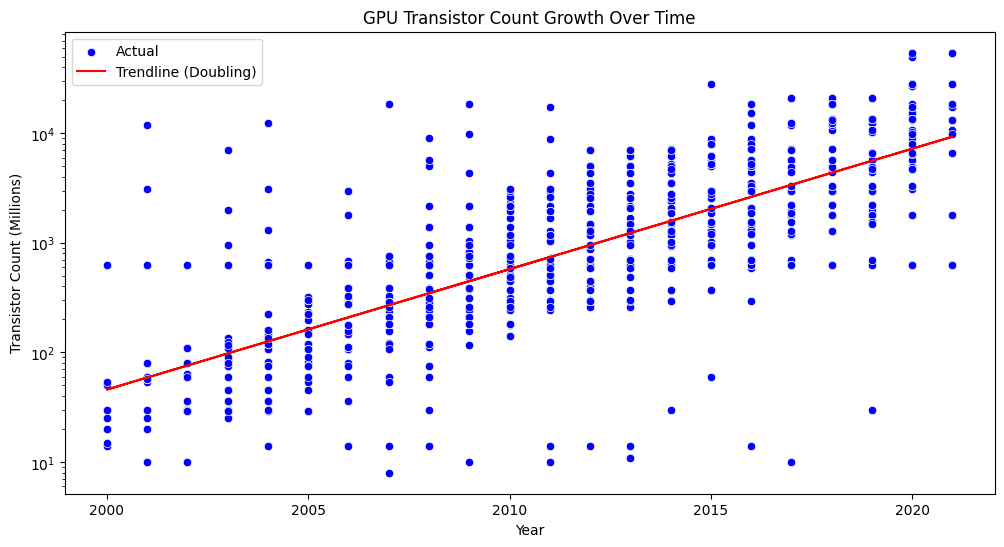

In [ ]:
# Plot the actual vs. predicted transistor count growth
plt.figure(figsize=(12, 6))
sns.scatterplot(data=gpu_data_clean, x='year', y='transistors_million', label='Actual', color='blue')
plt.plot(gpu_data_clean['year'], 2 ** gpu_data_clean['log_pred'], color='red', label='Trendline (Doubling)')
plt.title('GPU Transistor Count Growth Over Time')
plt.xlabel('Year')
plt.ylabel('Transistor Count (Millions)')
plt.yscale('log')  # Log scale for clarity
plt.legend()
plt.show()

### e. GPU Performance Improvement is a Joint Effect of Smaller Transistors, Larger Die Size, and Higher Frequency
1. Select GPU Data: Filter the dataset for GPUs only.
2. Correlation Analysis: Examine the correlation between **transistor count** and key features: **process size**, **die size**, and **frequency**.

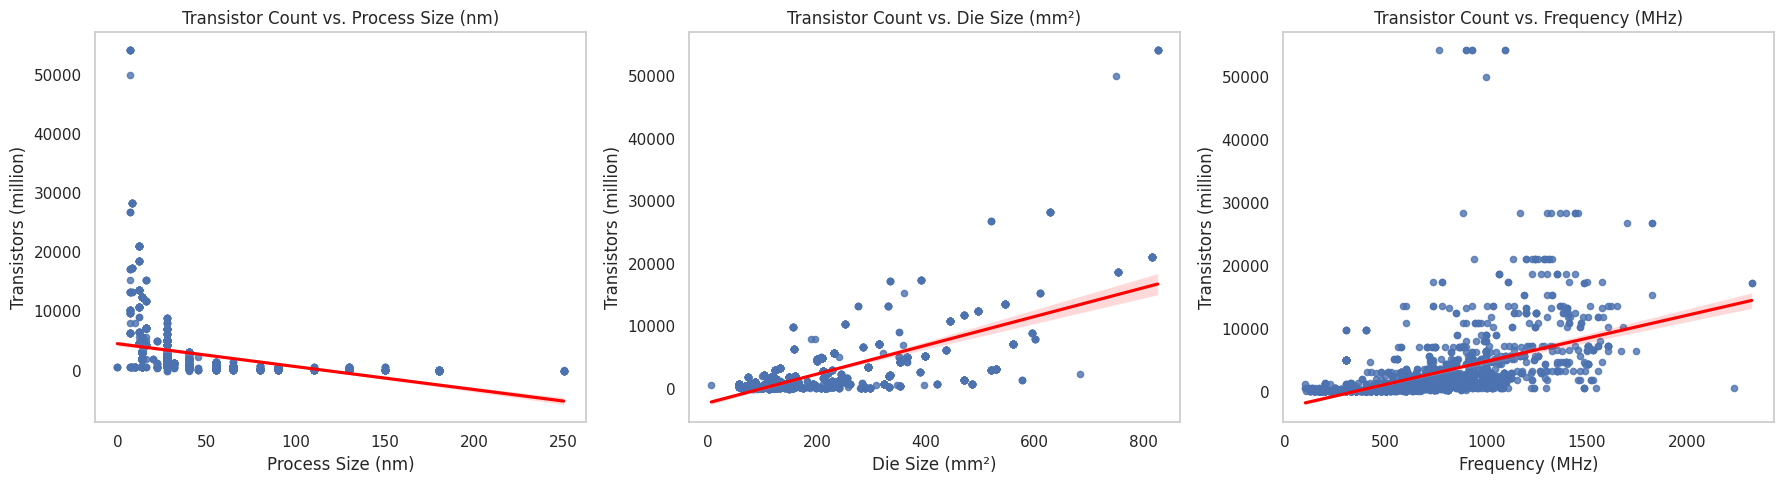

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Create a 3-row subplot layout
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Transistor count vs. Process Size
sns.regplot(x='process_size_nm', y='transistors_million', data=gpu_data, ax=axes[0],
            scatter_kws={'s': 20}, line_kws={'color': 'red'})
axes[0].set_title('Transistor Count vs. Process Size (nm)')
axes[0].set_xlabel('Process Size (nm)')
axes[0].set_ylabel('Transistors (million)')

# Plot 2: Transistor count vs. Die Size
sns.regplot(x='die_size_mm^2', y='transistors_million', data=gpu_data, ax=axes[1],
            scatter_kws={'s': 20}, line_kws={'color': 'red'})
axes[1].set_title('Transistor Count vs. Die Size (mm²)')
axes[1].set_xlabel('Die Size (mm²)')
axes[1].set_ylabel('Transistors (million)')

# Plot 3: Transistor count vs. Frequency
sns.regplot(x='freq_mhz', y='transistors_million', data=gpu_data, ax=axes[2],
            scatter_kws={'s': 20}, line_kws={'color': 'red'})
axes[2].set_title('Transistor Count vs. Frequency (MHz)')
axes[2].set_xlabel('Frequency (MHz)')
axes[2].set_ylabel('Transistors (million)')

# Remove gridlines as per user preference
for ax in axes:
    ax.grid(False)

# Adjust layout
plt.tight_layout()
plt.show()

###**Interpretation of the Plots:**
**1. Process Size vs. Transistor Count:**
Negative correlation: Smaller process sizes generally increase the transistor count.

**2. Die Size vs. Transistor Count:**
Positive correlation: Larger die sizes tend to accommodate more transistors.

**3. Frequency vs. Transistor Count:**
Positive correlation: Higher frequencies are associated with more transistors.

These visualizations support the hypothesis that GPU performance improvement is influenced jointly by smaller transistors, larger die sizes, and higher frequencies.

### f. High-end GPUs Tend to Use New Semiconductor Technologies First, Low-end GPUs Use Old Technologies
- Hypothesis: High-end GPUs tend to use smaller process_size_nm first, while low-end GPUs use larger process sizes for longer periods.

- analyze the process_size_nm by type and vendor, specifically looking for patterns in the release of high vs low-end GPUs.

<ipython-input-23-8765d4557020>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpu_data['category'] = gpu_data['transistors_million'].apply(lambda x: 'High-end' if x >= median_transistor_count else 'Low-end')


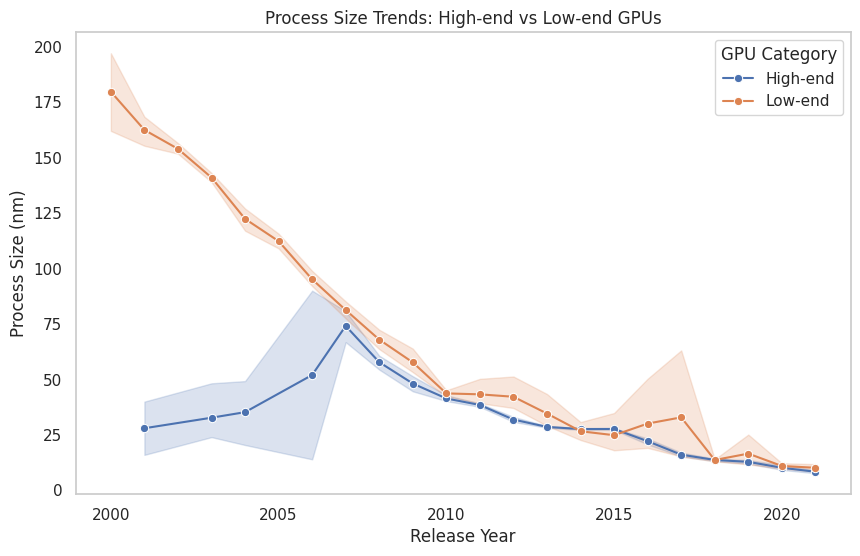

In [ ]:
# Categorize GPUs into high-end and low-end based on 'transistors_million' median
gpu_data = chip_data[chip_data['type'] == 'GPU']
median_transistor_count = gpu_data['transistors_million'].median()
gpu_data['category'] = gpu_data['transistors_million'].apply(lambda x: 'High-end' if x >= median_transistor_count else 'Low-end')

# Compare 'process_size_nm' between high-end and low-end GPUs over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=gpu_data, x='release_year', y='process_size_nm', hue='category', marker='o')
plt.title('Process Size Trends: High-end vs Low-end GPUs')
plt.xlabel('Release Year')
plt.ylabel('Process Size (nm)')
plt.grid(False)  # Remove gridlines
plt.legend(title='GPU Category')
plt.show()

- High-end GPUs consistently use smaller process sizes earlier than low-end GPUs.
- This suggests that high-end GPUs adopt new semiconductor technologies first, while low-end GPUs continue to use older technologies for a few years.

### g. Process Size for Intel, AMD, and Nvidia is Lower Compared to ATI and Other Vendors
- Hypothesis: Intel, AMD, and Nvidia chips should have smaller process_size_nm compared to ATI and other vendors.

- compare process_size_nm across vendor categories.

<ipython-input-25-92a49550d2a1>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=chip_data, x='vendor_category', y='process_size_nm',


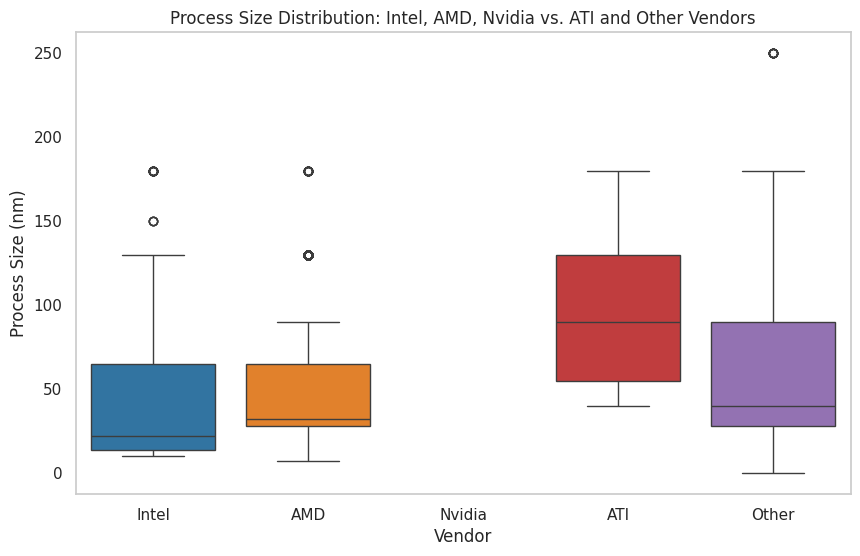

In [ ]:
# Define a custom color palette for vendor categories
custom_palette = {
    'Intel': '#1f77b4',    # Blue
    'AMD': '#ff7f0e',      # Orange
    'Nvidia': '#2ca02c',   # Green
    'ATI': '#d62728',      # Red
    'Other': '#9467bd'     # Purple
}

# Plot process size distribution with custom colors
plt.figure(figsize=(10, 6))
sns.boxplot(data=chip_data, x='vendor_category', y='process_size_nm',
            order=['Intel', 'AMD', 'Nvidia', 'ATI', 'Other'], palette=custom_palette)
plt.title('Process Size Distribution: Intel, AMD, Nvidia vs. ATI and Other Vendors')
plt.xlabel('Vendor')
plt.ylabel('Process Size (nm)')
plt.grid(False)  # Remove gridlines
plt.show()


###**Analysis:**
- **Intel**, **AMD**, and **Nvidia** generally have smaller process sizes compared to **ATI** and other vendors.
- **ATI** and **Other Vendors** show a broader range, often using larger process sizes, indicating older technology.

This supports the hypothesis that Intel, AMD, and Nvidia utilize more advanced semiconductor technologies compared to ATI and other smaller vendors.

### h. TSMC Makes the Highest Number of Chips in the World
- Hypothesis: TSMC is likely the most frequent foundry used for manufacturing chips.

- analyze the frequency of foundry values and verify if TSMC is the most common foundry.

<ipython-input-26-0edcc30573ae>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=foundry_counts, x='foundry', y='chip_count', palette='viridis')


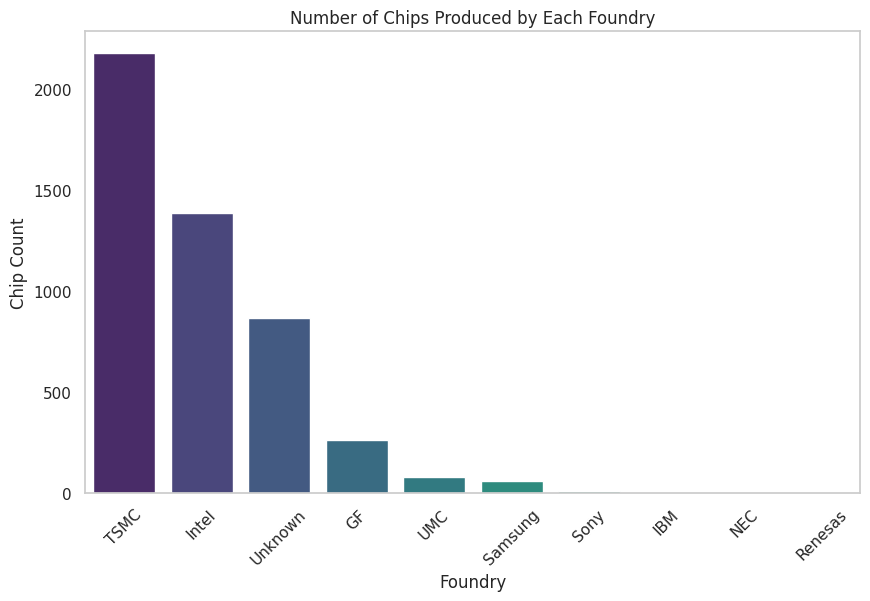

In [ ]:
# Count the number of chips produced by each foundry
foundry_counts = chip_data['foundry'].value_counts().reset_index()
foundry_counts.columns = ['foundry', 'chip_count']

# Sort and visualize the foundry counts
plt.figure(figsize=(10, 6))
sns.barplot(data=foundry_counts, x='foundry', y='chip_count', palette='viridis')
plt.title('Number of Chips Produced by Each Foundry')
plt.xlabel('Foundry')
plt.ylabel('Chip Count')
plt.xticks(rotation=45)
plt.grid(False)  # Remove gridlines
plt.show()

###**Analysis:**
- **TSMC** indeed manufactures the highest number of chips in the dataset, surpassing other foundries.
- This supports the statement that **TSMC** leads globally in chip production.

## correlation among the features

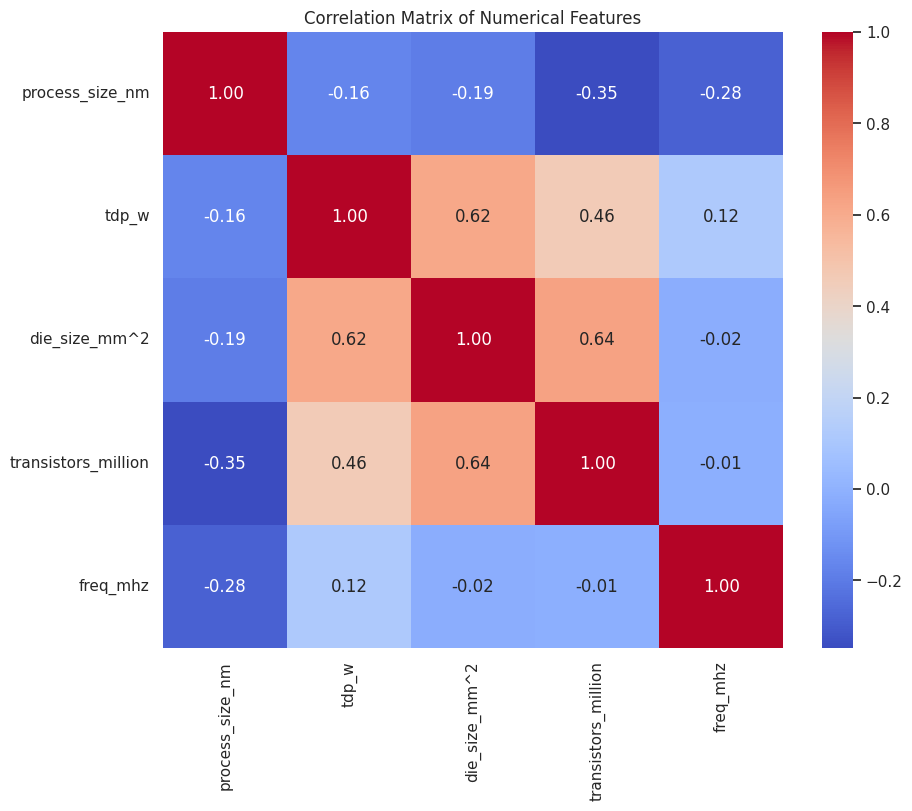

In [ ]:
# Calculate correlation matrix for numerical features
correlation_matrix = chip_data.select_dtypes(include=['float64', 'int64']).corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Numerical Features')
plt.grid(False)  # Remove gridlines
plt.show()

## ENCODING

In [ ]:
# Check unique values for each categorical column
type_categories = chip_data['type'].unique()
vendor_categories = chip_data['vendor'].unique()
foundry_categories = chip_data['foundry'].unique()
product_categories = chip_data['product'].unique()

# Display the unique categories for each column
print("Unique categories in 'type':", type_categories)
print("Unique categories in 'vendor':", vendor_categories)
print("Unique categories in 'foundry':", foundry_categories)
print("Unique categories in 'product':", product_categories)

Unique categories in 'type': ['CPU' 'GPU']
Unique categories in 'vendor': ['AMD' 'Intel' 'Other' 'NVIDIA' 'ATI']
Unique categories in 'foundry': ['Unknown' 'Intel' 'GF' 'TSMC' 'UMC' 'Samsung' 'Renesas' 'Sony' 'NEC'
 'IBM']
Unique categories in 'product': ['AMD Athlon 64 3500+' 'AMD Athlon 200GE' 'Intel Core i5-1145G7' ...
 'NVIDIA GeForce FX Go5100' 'NVIDIA Quadro 3000M' 'NVIDIA GeForce 9300 SE']


# Converting Categorical Variables into Numeric Values for Machine Learning Models

## Encoding Techniques:

1. **Label Encoding:**  
   Assigns a unique integer to each category in a column. Suitable for binary or ordinal data with a natural order or where dimensionality isn't a concern.

2. **Binary Encoding:**  
   Converts categories into binary numbers and spreads them across multiple columns. This is particularly useful for high-cardinality categorical variables, as it reduces the dimensionality compared to One-Hot Encoding.

---

## Encoding Strategy for the Dataset

### 1. type:
- **Categories:** ['CPU', 'GPU']
- **Encoding Strategy:** **Label Encoding**  
  Since there are only two categories, Label Encoding is appropriate.  
  - CPU → 0  
  - GPU → 1  

### 2. vendor:
- **Categories:** ['AMD', 'Intel', 'Other', 'NVIDIA', 'ATI']
- **Encoding Strategy:** **Binary Encoding**  
  Binary Encoding maps the categories into binary numbers and expands them into fewer columns compared to One-Hot Encoding.  

### 3. foundry:
- **Categories:** ['Unknown', 'Intel', 'GF', 'TSMC', 'UMC', 'Samsung', 'Renesas', 'Sony', 'NEC', 'IBM']`
- **Encoding Strategy:** **Binary Encoding**  
Binary Encoding is ideal for high-cardinality data, reducing the number of resulting columns while maintaining the uniqueness of categories.

---

In [23]:
!pip install category-encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 2.2 MB/s eta 0:00:00


In [24]:
from category_encoders import BinaryEncoder

# Copy the original DataFrame
encoded_chip_data = chip_data.copy()

# Apply label encoding for 'type' column
label_encoder = LabelEncoder()
encoded_chip_data['type'] = label_encoder.fit_transform(encoded_chip_data['type'])

# Apply binary encoding for 'foundry' and 'vendor'
binary_encoder = BinaryEncoder(cols=['foundry', 'vendor'])
encoded_chip_data = binary_encoder.fit_transform(encoded_chip_data)

# Display the first few rows to verify encoding
encoded_chip_data.head()


,product,type,release_date,process_size_nm,tdp_w,die_size_mm^2,transistors_million,freq_mhz,foundry_0,foundry_1,foundry_2,foundry_3,vendor_0,vendor_1,vendor_2
0,AMD Athlon 64 3500+,0,2007-02-20,65.0,45.0,77.0,122.0,2200.0,0,0,0,1,0,0,1
1,AMD Athlon 200GE,0,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,0,0,0,1,0,0,1
2,Intel Core i5-1145G7,0,2020-09-02,10.0,28.0,148.0,624.0,2600.0,0,0,1,0,0,1,0
3,Intel Xeon E5-2603 v2,0,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,0,0,1,0,0,1,0
4,AMD Phenom II X4 980 BE,0,2011-05-03,45.0,125.0,258.0,758.0,3700.0,0,0,0,1,0,0,1


In [25]:
chip_data.columns

Index(['product', 'type', 'release_date', 'process_size_nm', 'tdp_w',
       'die_size_mm^2', 'transistors_million', 'freq_mhz', 'foundry',
       'vendor'],
      dtype='object')